<a href="https://colab.research.google.com/github/Shahilasulthana/TensorFlow/blob/main/california_housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading California Housing Dataset...
Dataset shape: (20640, 8)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target shape: (20640,)

Using feature: MedInc
MedInc feature shape: (20640, 1)
MedInc range: [0.50, 15.00]
Target (MedHouseVal) range: [0.15, 5.00]

Training set size: 16512
Test set size: 4128

After scaling:
Training MedInc range: [-1.78, 5.84]
Test MedInc range: [-1.78, 5.84]

Building TensorFlow Linear Regression Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.6363 - mae: 1.9672 - val_loss: 3.2880 - val_mae: 1.6082
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.8929 - mae: 1.4895 - val_loss: 2.0826 - val_mae: 1.1883
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.8402 - mae: 1.0949 - val_loss: 1.3687 - val_mae: 0.8667
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2227 - mae: 0.8105 - val_loss: 0.9806 - val_mae: 0.6840
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8969 - mae: 0.6625 - val_loss: 0.7996 - val_mae: 0.6210
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7521 - mae: 0.6130 - val_loss: 0.7320 - val_mae: 0.6134
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7017 - mae: 0.6091 - val_loss: 0.7133 - val_mae: 0.6201
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6891 - mae: 0.6156 - val_loss: 0.7097 - val_mae: 0.6261
Epoch 9/100
516/516 ━━━━━

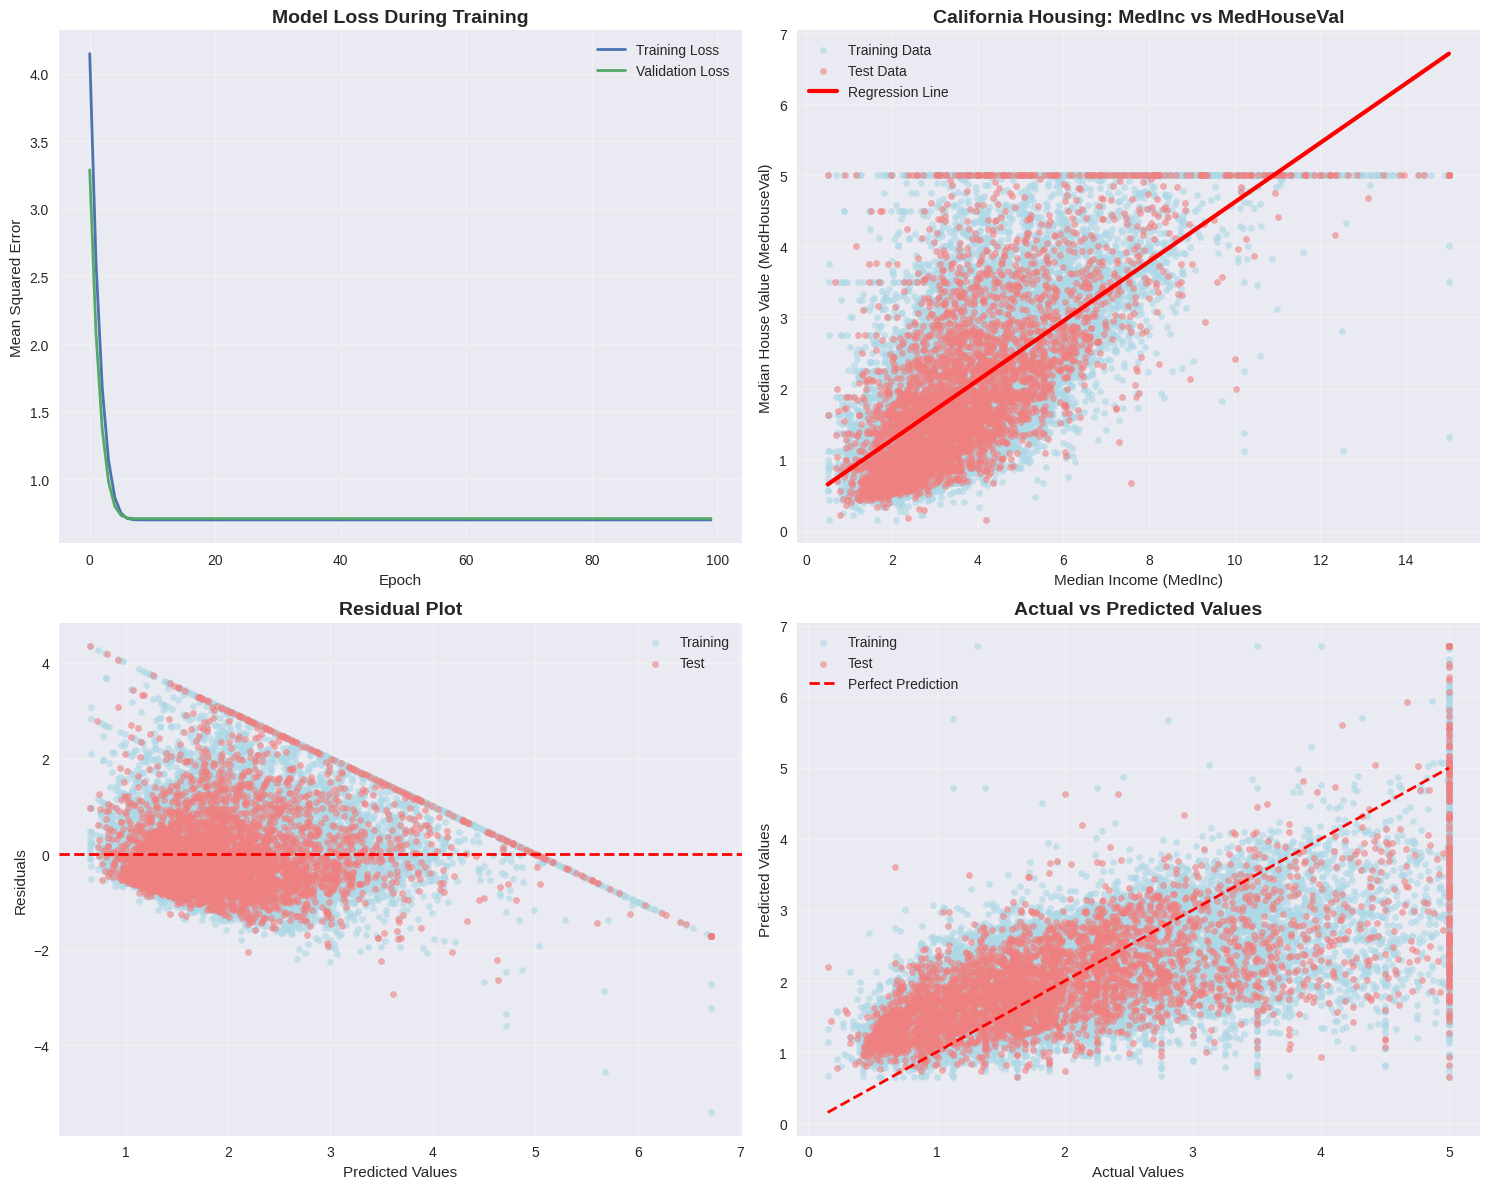


Additional Analysis:
Correlation coefficient between MedInc and MedHouseVal: 0.6881
R-squared (training): 0.4769
R-squared (test): 0.4588

Sample Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
MedInc: 2.0 -> Predicted MedHouseVal: 1.28
MedInc: 4.0 -> Predicted MedHouseVal: 2.11
MedInc: 6.0 -> Predicted MedHouseVal: 2.95
MedInc: 8.0 -> Predicted MedHouseVal: 3.79

Model successfully trained! The linear regression model uses median income
to predict median house values with an R-squared of 0.4588 on the test set.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Loading California Housing Dataset...")
# Load the California Housing dataset
housing = fetch_california_housing()

# Extract features and target
X = housing.data
y = housing.target
feature_names = housing.feature_names

print(f"Dataset shape: {X.shape}")
print(f"Feature names: {feature_names}")
print(f"Target shape: {y.shape}")

# Select MedInc (median income) as the input feature
# MedInc is the first feature (index 0) in the California Housing dataset
med_inc_idx = 0
X_med_inc = X[:, med_inc_idx].reshape(-1, 1)  # Reshape for sklearn compatibility

print(f"\nUsing feature: {feature_names[med_inc_idx]}")
print(f"MedInc feature shape: {X_med_inc.shape}")
print(f"MedInc range: [{X_med_inc.min():.2f}, {X_med_inc.max():.2f}]")
print(f"Target (MedHouseVal) range: [{y.min():.2f}, {y.max():.2f}]")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_med_inc, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Normalize/scale the input feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nAfter scaling:")
print(f"Training MedInc range: [{X_train_scaled.min():.2f}, {X_train_scaled.max():.2f}]")
print(f"Test MedInc range: [{X_test_scaled.min():.2f}, {X_test_scaled.max():.2f}]")

# Build the TensorFlow linear regression model
print("\nBuilding TensorFlow Linear Regression Model...")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), activation='linear')
])

# Compile the model with Adam optimizer and MSE loss
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# Display model architecture
model.summary()

# Train the model
print("\nTraining the model...")
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate performance metrics
train_mse = np.mean((y_train - y_train_pred.flatten())**2)
test_mse = np.mean((y_test - y_test_pred.flatten())**2)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"\nModel Performance:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Get model parameters
weights = model.get_weights()
slope = weights[0][0][0]
intercept = weights[1][0]
print(f"\nModel Parameters:")
print(f"Slope (weight): {slope:.4f}")
print(f"Intercept (bias): {intercept:.4f}")

# Create visualizations
plt.style.use('seaborn-v0_8')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Loss curve during training
ax1.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax1.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax1.set_title('Model Loss During Training', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Mean Squared Error')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Scatter plot with regression line (using original unscaled data for interpretability)
ax2.scatter(X_train, y_train, alpha=0.6, color='lightblue', s=20, label='Training Data')
ax2.scatter(X_test, y_test, alpha=0.6, color='lightcoral', s=20, label='Test Data')

# Create regression line using original scale
x_line = np.linspace(X_med_inc.min(), X_med_inc.max(), 100).reshape(-1, 1)
x_line_scaled = scaler.transform(x_line)
y_line = model.predict(x_line_scaled)
ax2.plot(x_line, y_line, color='red', linewidth=3, label='Regression Line')

ax2.set_title('California Housing: MedInc vs MedHouseVal', fontsize=14, fontweight='bold')
ax2.set_xlabel('Median Income (MedInc)')
ax2.set_ylabel('Median House Value (MedHouseVal)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Residual plot
residuals_train = y_train - y_train_pred.flatten()
residuals_test = y_test - y_test_pred.flatten()

ax3.scatter(y_train_pred, residuals_train, alpha=0.6, color='lightblue', s=20, label='Training')
ax3.scatter(y_test_pred, residuals_test, alpha=0.6, color='lightcoral', s=20, label='Test')
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax3.set_title('Residual Plot', fontsize=14, fontweight='bold')
ax3.set_xlabel('Predicted Values')
ax3.set_ylabel('Residuals')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Actual vs Predicted scatter plot
ax4.scatter(y_train, y_train_pred, alpha=0.6, color='lightblue', s=20, label='Training')
ax4.scatter(y_test, y_test_pred, alpha=0.6, color='lightcoral', s=20, label='Test')
ax4.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Perfect Prediction')
ax4.set_title('Actual vs Predicted Values', fontsize=14, fontweight='bold')
ax4.set_xlabel('Actual Values')
ax4.set_ylabel('Predicted Values')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis
print(f"\nAdditional Analysis:")
print(f"Correlation coefficient between MedInc and MedHouseVal: {np.corrcoef(X_med_inc.flatten(), y)[0,1]:.4f}")
print(f"R-squared (training): {1 - (np.sum(residuals_train**2) / np.sum((y_train - np.mean(y_train))**2)):.4f}")
print(f"R-squared (test): {1 - (np.sum(residuals_test**2) / np.sum((y_test - np.mean(y_test))**2)):.4f}")

# Sample predictions
print(f"\nSample Predictions:")
sample_incomes = np.array([[2.0], [4.0], [6.0], [8.0]])
sample_incomes_scaled = scaler.transform(sample_incomes)
sample_predictions = model.predict(sample_incomes_scaled)

for i, (income, prediction) in enumerate(zip(sample_incomes.flatten(), sample_predictions.flatten())):
    print(f"MedInc: {income:.1f} -> Predicted MedHouseVal: {prediction:.2f}")

print(f"\nModel successfully trained! The linear regression model uses median income")
print(f"to predict median house values with an R-squared of {1 - (np.sum(residuals_test**2) / np.sum((y_test - np.mean(y_test))**2)):.4f} on the test set.")